In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
from shapely.geometry import Point

/usr/local/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
rwi_cellular_2019_india = pd.read_csv("/Users/ishaarora/Desktop/rwi_cellular_2019_india.csv")
rwi_cellular_2020_india = pd.read_csv("/Users/ishaarora/Desktop/India_interim/RWI_cellular_2020_india.csv")
rwi_cellular_2021_india = pd.read_csv("/Users/ishaarora/Desktop/India_interim/RWI_cellular_2021_india.csv")
rwi_cellular_2022_india = pd.read_csv("/Users/ishaarora/Desktop/India_interim/RWI_cellular_2022_india.csv")


In [4]:
rwi_cellular_2019_india_pivot = pd.pivot_table(rwi_cellular_2019_india, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["dtname"])
rwi_cellular_2019_india_pivot["avg_d_mbps_qs"] = rwi_cellular_2019_india_pivot[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)

rwi_cellular_2020_india_pivot = pd.pivot_table(rwi_cellular_2020_india, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["dtname"])
rwi_cellular_2020_india_pivot["avg_d_mbps_qs"] = rwi_cellular_2020_india_pivot[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)

rwi_cellular_2021_india_pivot = pd.pivot_table(rwi_cellular_2021_india, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["dtname"])
rwi_cellular_2021_india_pivot["avg_d_mbps_qs"] = rwi_cellular_2021_india_pivot[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)

rwi_cellular_2022_india_pivot = pd.pivot_table(rwi_cellular_2022_india, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["dtname"])
rwi_cellular_2022_india_pivot["avg_d_mbps_qs"] = rwi_cellular_2022_india_pivot[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)


In [5]:
rwi_cellular_2019_copy = rwi_cellular_2019_india_pivot.copy()
rwi_cellular_2019_copy = rwi_cellular_2019_copy.reset_index()

rwi_cellular_2020_copy = rwi_cellular_2020_india_pivot.copy()
rwi_cellular_2020_copy = rwi_cellular_2020_copy.reset_index()

rwi_cellular_2021_copy = rwi_cellular_2021_india_pivot.copy()
rwi_cellular_2021_copy = rwi_cellular_2021_copy.reset_index()

rwi_cellular_2022_copy = rwi_cellular_2022_india_pivot.copy()
rwi_cellular_2022_copy = rwi_cellular_2022_copy.reset_index()

In [6]:
rwi_cellular_2019_2022 = rwi_cellular_2019_copy[["avg_d_mbps_qs", "dtname"]].merge(rwi_cellular_2020_copy[["avg_d_mbps_qs", "dtname"]], on = "dtname", suffixes = ('_x', '_y')).merge(rwi_cellular_2021_copy[["avg_d_mbps_qs", "dtname"]], on = "dtname", suffixes = ('_a', '_b')).merge(rwi_cellular_2022_copy[["avg_d_mbps_qs", "dtname"]], on = "dtname", suffixes = ('_c', '_d'))



#.merge(rwi_cellular_2021_copy, on = "NAME_3").merge(rwi_cellular_2022_copy, on = "NAME_3")
rwi_cellular_2019_2022 = rwi_cellular_2019_2022.rename(columns = {"avg_d_mbps_qs_x": "2019", "avg_d_mbps_qs_y": "2020", "avg_d_mbps_qs_c": "2021", "avg_d_mbps_qs_d": "2022"})

In [7]:
rwi_cellular_2019_2022_avg = rwi_cellular_2019_2022.drop(columns = ["dtname"]).mean(axis = 0)
rwi_cellular_2019_2022_avg

2019    12.171600
2020    12.829530
2021    16.216355
2022    20.934921
dtype: float64

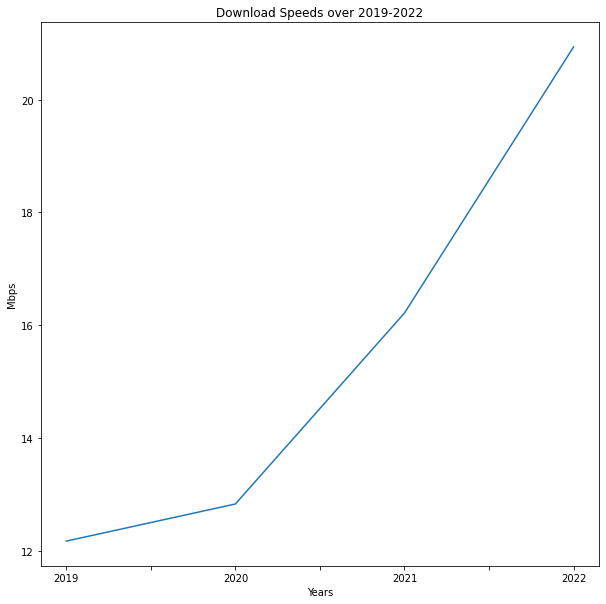

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
rwi_cellular_2019_2022_avg.plot(kind = "line", ax = ax)
plt.title("Download Speeds over 2019-2022")
plt.xlabel("Years")
plt.ylabel("Mbps")
plt.show()

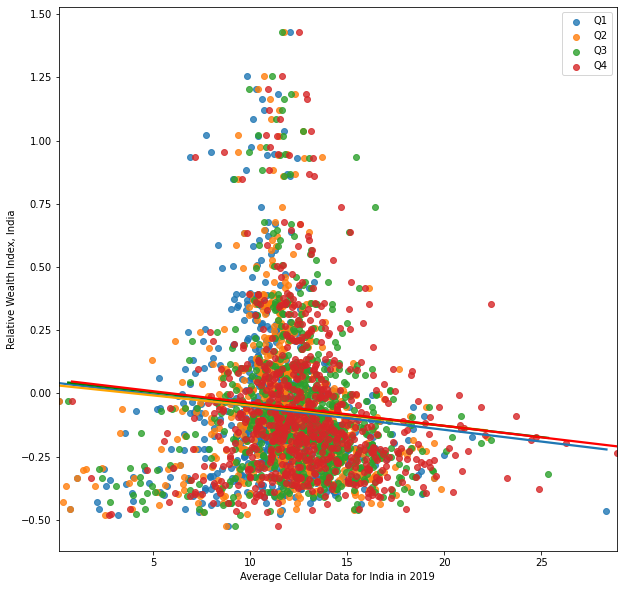

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(data = rwi_cellular_2019_india_pivot, x = "avg_d_mbps_Q1" , y = "rwi", fit_reg = True, ci=False, ax = ax, label = "Q1");
sns.regplot(data = rwi_cellular_2019_india_pivot, x = "avg_d_mbps_Q2" , y = "rwi", fit_reg = True, ci=False, ax = ax, line_kws={'color':'orange'}, label = "Q2");
sns.regplot(data = rwi_cellular_2019_india_pivot, x = "avg_d_mbps_Q3" , y = "rwi", fit_reg = True, ci=False, ax = ax, line_kws={'color':'green'}, label = "Q3");
sns.regplot(data = rwi_cellular_2019_india_pivot, x = "avg_d_mbps_Q4" , y = "rwi", fit_reg = True, ci=False, ax = ax, line_kws={'color':'red'}, label = "Q4");
ax.set(ylabel='Relative Wealth Index, India', xlabel='Average Cellular Data for India in 2019')
ax.legend()
plt.show()

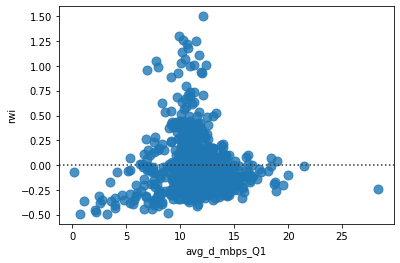

In [6]:
sns.residplot(data = rwi_cellular_2019_india_pivot, x = "avg_d_mbps_Q1" , y = "rwi", scatter_kws={"s": 80});

# checking whether the simple regression model is appropriate for a dataset. 
#It fits and removes a simple linear regression and then plots the residual values for each observation. 
#Ideally, these values should be randomly scattered around y = 0

In [7]:
import plotly.io as pio
pio.renderers.default = "iframe"
import plotly.express as px
# import statsmodels.api as sm
# px.scatter(rwi_cellular_2019_india_pivot, x = ["avg_d_mbps_Q1", "avg_d_mbps_Q2", "avg_d_mbps_Q3", "avg_d_mbps_Q4"], y = "rwi",
#            trendline='ols', width=1000, height=800, labels = {"rwi": "Relative Wealth Index, India", "value": "Average Cellular Data for 2019"}, 
#            title = "Average Cellular Data for India with Relative Wealth, 2019")

fig = px.scatter(rwi_cellular_2019_india_pivot, x = ["avg_d_mbps_Q1", "avg_d_mbps_Q2", "avg_d_mbps_Q3", "avg_d_mbps_Q4"], y = "rwi",
           trendline='ols', width=1000, height=800, labels = {"rwi": "Relative Wealth Index, India", "value": "Average Cellular Data for 2019"}, 
           title = "Average Cellular Data for India with Relative Wealth, 2019", color_discrete_sequence=['#1f77b4', '#ff7f0e', 'forestgreen', '#e377c2'])


(['Q1', 'Q2', 'Q3', 'Q4'])    


newnames = {'avg_d_mbps_Q1':'Q1', 'avg_d_mbps_Q2': 'Q2', 'avg_d_mbps_Q3':'Q3', 'avg_d_mbps_Q4': 'Q4'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()


In [8]:
#from data 100 textbook:

def theta_1(x, y):
    r = x.corr(y)
    return r * y.std() / x.std()

def theta_0(x, y):
    return y.mean() - theta_1(x, y) * x.mean()

t1 = theta_1(rwi_cellular_2019_india_pivot['avg_d_mbps_qs'], rwi_cellular_2019_india_pivot['rwi'])
t0 = theta_0(rwi_cellular_2019_india_pivot['avg_d_mbps_qs'], rwi_cellular_2019_india_pivot['rwi'])

In [9]:
print(t0, t1)

0.07138756926565304 -0.011065773262344602


#### Model is 0.07138 + (-)0.0110(Cellular Data, in mbps)

In [10]:
prediction = t0 + t1 * rwi_cellular_2019_india_pivot['avg_d_mbps_qs']
error = rwi_cellular_2019_india_pivot['rwi'] - prediction
fit = pd.DataFrame(dict(prediction=prediction, error=error))

In [11]:
fig = px.scatter(fit, y='error', x='prediction',  width=1000, height=800)

fig.add_hline(0, line_width=2, line_dash='dash', opacity=1)
fig.show()

In [12]:
rwi_cellular_2019_india_pivot[["avg_d_mbps_qs", "rwi"]].corr()

,avg_d_mbps_qs,rwi
avg_d_mbps_qs,1.000000,-0.096519
rwi,-0.096519,1.000000


In [13]:
error.std()


0.29401930718876

In [14]:
rwi_cellular_2019_india_pivot["rwi"].std()

0.29539848683889897

In [15]:
from sklearn.linear_model import LinearRegression 

y = rwi_cellular_2019_india_pivot['rwi']
x = rwi_cellular_2019_india_pivot['avg_d_mbps_qs']
reg = LinearRegression().fit(x.values.reshape(-1,1), y)



In [16]:
print(f"Relative Wealth Index = {reg.intercept_:.2f} + {reg.coef_[0]:.2f}(Cellular Data in mbps)")

Relative Wealth Index = 0.07 + -0.01(Cellular Data in mbps)


In [17]:
DHS_india = pd.read_csv("/Users/ishaarora/Desktop/DHS_India.csv")
DHS_india

,shdist,sum_male_1,sum_female_2,male:female,sum_ages,hv105_01,hv105_02,hv105_03,hv105_04,hv105_05,...,hv105_32,hv105_33,hv105_34,hv105_35,hv115_01,Marital Status of Household Head,hv206,hv213,hv216,hv271
0,adilabad,1814,1816,0.998899,33.611172,5.485214,4.294633,3.493976,1.854326,0.499452,...,0.0,0.0,0.0,0.0,1.0,Married,902,25192,1.506024,3815.900
1,agar malwa,1537,1457,1.054907,34.840590,4.818820,2.639045,3.540730,1.612360,0.530899,...,0.0,0.0,0.0,0.0,1.0,Married,706,17819,1.820225,-182973.264
2,agra,2544,2403,1.058677,26.975636,7.056144,4.368644,4.690678,2.619703,1.063559,...,0.0,0.0,0.0,0.0,1.0,Married,926,26856,1.992585,437865.261
3,ahmadabad,2098,1954,1.073695,35.756623,8.491170,6.791391,5.731788,3.467991,1.282561,...,0.0,0.0,0.0,0.0,1.0,Married,901,29865,1.816777,1066334.918
4,ahmadnagar,2030,1955,1.038363,36.590034,7.164213,5.396376,5.226501,2.966025,1.060023,...,0.0,0.0,0.0,0.0,1.0,Married,822,25739,1.582106,227211.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,yadgir,2467,2502,0.986011,28.419248,3.148230,2.763274,3.629425,2.293142,0.881637,...,0.0,0.0,0.0,0.0,1.0,Married,894,25318,1.659292,-244108.279
696,yamunanagar,2344,2147,1.091756,32.123362,6.813319,6.247817,6.265284,4.139738,1.399563,...,0.0,0.0,0.0,0.0,1.0,Married,914,27505,1.993450,1038575.439
697,yanam,1588,1714,0.926488,35.516866,6.540805,6.504897,4.233950,2.015234,0.522307,...,0.0,0.0,0.0,0.0,1.0,Married,917,30636,1.583243,926694.619
698,yavatmal,1877,1855,1.011860,35.361993,6.401972,5.580504,4.308872,2.596933,0.856517,...,0.0,0.0,0.0,0.0,1.0,Married,878,23050,1.756846,47725.214


In [17]:
rwi_cellular_2019_india_pivot = rwi_cellular_2019_india_pivot.reset_index()

In [18]:
rwi_cellular_dhs_2019 = rwi_cellular_2019_india_pivot.merge(DHS_india,left_on = rwi_cellular_2019_india_pivot["dtname"].str.lower(),right_on = "shdist")
rwi_cellular_dhs_2019

#matched on 616 districts instead of 700

,dtname,avg_d_mbps_Q1,avg_d_mbps_Q2,avg_d_mbps_Q3,avg_d_mbps_Q4,rwi,avg_d_mbps_qs,shdist,sum_male_1,sum_female_2,...,hv105_32,hv105_33,hv105_34,hv105_35,hv115_01,Marital Status of Household Head,hv206,hv213,hv216,hv271
0,Adilabad,19.479248,19.479393,17.787611,23.263105,-0.335678,20.002340,adilabad,1814,1816,...,0.0,0.0,0.0,0.0,1.0,Married,902,25192,1.506024,3815.900
1,Agar Malwa,13.486769,15.721627,13.715217,12.488622,-0.340189,13.853059,agar malwa,1537,1457,...,0.0,0.0,0.0,0.0,1.0,Married,706,17819,1.820225,-182973.264
2,Agra,9.597105,10.906111,10.387457,10.723455,0.056982,10.403532,agra,2544,2403,...,0.0,0.0,0.0,0.0,1.0,Married,926,26856,1.992585,437865.261
3,Ahmadabad,11.465272,12.105978,13.531644,12.473057,-0.102668,12.393988,ahmadabad,2098,1954,...,0.0,0.0,0.0,0.0,1.0,Married,901,29865,1.816777,1066334.918
4,Ahmadnagar,12.072350,13.365319,14.304258,13.849296,-0.115268,13.397806,ahmadnagar,2030,1955,...,0.0,0.0,0.0,0.0,1.0,Married,822,25739,1.582106,227211.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,Yadgir,12.260981,14.074012,12.332658,14.483188,-0.178347,13.287710,yadgir,2467,2502,...,0.0,0.0,0.0,0.0,1.0,Married,894,25318,1.659292,-244108.279
612,Yamunanagar,10.578725,11.671898,12.673457,13.674654,0.344070,12.149683,yamunanagar,2344,2147,...,0.0,0.0,0.0,0.0,1.0,Married,914,27505,1.993450,1038575.439
613,Yanam,11.003105,12.880367,13.423444,22.391286,0.354667,14.924551,yanam,1588,1714,...,0.0,0.0,0.0,0.0,1.0,Married,917,30636,1.583243,926694.619
614,Yavatmal,12.463744,13.038956,14.078111,13.749106,-0.277843,13.332479,yavatmal,1877,1855,...,0.0,0.0,0.0,0.0,1.0,Married,878,23050,1.756846,47725.214


In [19]:
pip install psmpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: /usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [21]:
rwi_cellular_dhs_2019.loc[~(rwi_cellular_dhs_2019==0).all(axis=1)]


,dtname,avg_d_mbps_Q1,avg_d_mbps_Q2,avg_d_mbps_Q3,avg_d_mbps_Q4,rwi,avg_d_mbps_qs,shdist,sum_male_1,sum_female_2,...,hv105_32,hv105_33,hv105_34,hv105_35,hv115_01,Marital Status of Household Head,hv206,hv213,hv216,hv271
0,Adilabad,19.479248,19.479393,17.787611,23.263105,-0.335678,20.002340,adilabad,1814,1816,...,0.0,0.0,0.0,0.0,1.0,Married,902,25192,1.506024,3815.900
1,Agar Malwa,13.486769,15.721627,13.715217,12.488622,-0.340189,13.853059,agar malwa,1537,1457,...,0.0,0.0,0.0,0.0,1.0,Married,706,17819,1.820225,-182973.264
2,Agra,9.597105,10.906111,10.387457,10.723455,0.056982,10.403532,agra,2544,2403,...,0.0,0.0,0.0,0.0,1.0,Married,926,26856,1.992585,437865.261
3,Ahmadabad,11.465272,12.105978,13.531644,12.473057,-0.102668,12.393988,ahmadabad,2098,1954,...,0.0,0.0,0.0,0.0,1.0,Married,901,29865,1.816777,1066334.918
4,Ahmadnagar,12.072350,13.365319,14.304258,13.849296,-0.115268,13.397806,ahmadnagar,2030,1955,...,0.0,0.0,0.0,0.0,1.0,Married,822,25739,1.582106,227211.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,Yadgir,12.260981,14.074012,12.332658,14.483188,-0.178347,13.287710,yadgir,2467,2502,...,0.0,0.0,0.0,0.0,1.0,Married,894,25318,1.659292,-244108.279
612,Yamunanagar,10.578725,11.671898,12.673457,13.674654,0.344070,12.149683,yamunanagar,2344,2147,...,0.0,0.0,0.0,0.0,1.0,Married,914,27505,1.993450,1038575.439
613,Yanam,11.003105,12.880367,13.423444,22.391286,0.354667,14.924551,yanam,1588,1714,...,0.0,0.0,0.0,0.0,1.0,Married,917,30636,1.583243,926694.619
614,Yavatmal,12.463744,13.038956,14.078111,13.749106,-0.277843,13.332479,yavatmal,1877,1855,...,0.0,0.0,0.0,0.0,1.0,Married,878,23050,1.756846,47725.214


In [22]:
rwi_cellular_dhs_2019["Binary Value"] =  ["1" if x >= 12.143287 else "0" for x in rwi_cellular_dhs_2019["avg_d_mbps_qs"]]
rwi_cellular_dhs_2019

,dtname,avg_d_mbps_Q1,avg_d_mbps_Q2,avg_d_mbps_Q3,avg_d_mbps_Q4,rwi,avg_d_mbps_qs,shdist,sum_male_1,sum_female_2,...,hv105_33,hv105_34,hv105_35,hv115_01,Marital Status of Household Head,hv206,hv213,hv216,hv271,Binary Value
0,Adilabad,19.479248,19.479393,17.787611,23.263105,-0.335678,20.002340,adilabad,1814,1816,...,0.0,0.0,0.0,1.0,Married,902,25192,1.506024,3815.900,1
1,Agar Malwa,13.486769,15.721627,13.715217,12.488622,-0.340189,13.853059,agar malwa,1537,1457,...,0.0,0.0,0.0,1.0,Married,706,17819,1.820225,-182973.264,1
2,Agra,9.597105,10.906111,10.387457,10.723455,0.056982,10.403532,agra,2544,2403,...,0.0,0.0,0.0,1.0,Married,926,26856,1.992585,437865.261,0
3,Ahmadabad,11.465272,12.105978,13.531644,12.473057,-0.102668,12.393988,ahmadabad,2098,1954,...,0.0,0.0,0.0,1.0,Married,901,29865,1.816777,1066334.918,1
4,Ahmadnagar,12.072350,13.365319,14.304258,13.849296,-0.115268,13.397806,ahmadnagar,2030,1955,...,0.0,0.0,0.0,1.0,Married,822,25739,1.582106,227211.174,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,Yadgir,12.260981,14.074012,12.332658,14.483188,-0.178347,13.287710,yadgir,2467,2502,...,0.0,0.0,0.0,1.0,Married,894,25318,1.659292,-244108.279,1
612,Yamunanagar,10.578725,11.671898,12.673457,13.674654,0.344070,12.149683,yamunanagar,2344,2147,...,0.0,0.0,0.0,1.0,Married,914,27505,1.993450,1038575.439,1
613,Yanam,11.003105,12.880367,13.423444,22.391286,0.354667,14.924551,yanam,1588,1714,...,0.0,0.0,0.0,1.0,Married,917,30636,1.583243,926694.619,1
614,Yavatmal,12.463744,13.038956,14.078111,13.749106,-0.277843,13.332479,yavatmal,1877,1855,...,0.0,0.0,0.0,1.0,Married,878,23050,1.756846,47725.214,1


In [42]:
# rwi_cellular_dhs_2019.to_csv("/Users/ishaarora/Downloads/Rwi_cellular_dhs_2019.csv", index = False)

In [23]:
rwi_cellular_dhs_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dtname                            616 non-null    object 
 1   avg_d_mbps_Q1                     616 non-null    float64
 2   avg_d_mbps_Q2                     616 non-null    float64
 3   avg_d_mbps_Q3                     616 non-null    float64
 4   avg_d_mbps_Q4                     616 non-null    float64
 5   rwi                               616 non-null    float64
 6   avg_d_mbps_qs                     616 non-null    float64
 7   shdist                            616 non-null    object 
 8   sum_male_1                        616 non-null    int64  
 9   sum_female_2                      616 non-null    int64  
 10  male:female                       616 non-null    float64
 11  sum_ages                          616 non-null    float64
 12  hv105_01

In [24]:
psm = PsmPy(rwi_cellular_dhs_2019, treatment='Binary Value', indx='shdist', exclude = [ "avg_d_mbps_Q1","avg_d_mbps_Q2", "avg_d_mbps_Q3", 
                                                                                       "avg_d_mbps_Q4", "avg_d_mbps_qs", "rwi", "Marital Status of Household Head", "dtname"])
psm

In [25]:
psm.logistic_ps(balance = True)

In [26]:
psm.predicted_data


,shdist,sum_male_1,sum_female_2,male:female,sum_ages,hv105_01,hv105_02,hv105_03,hv105_04,hv105_05,...,hv105_34,hv105_35,hv115_01,hv206,hv213,hv216,hv271,propensity_score,propensity_logit,Binary Value
0,ambedkar nagar,2357,2603,0.905494,27.870044,5.954846,4.778634,5.585903,2.864537,1.529736,...,0.0,0.0,1.0,843,14725,2.003304,-483498.230,0.273012,-0.979392,0
1,anugul,1831,1854,0.987594,34.586528,5.675794,4.530120,3.358160,1.812705,0.591457,...,0.0,0.0,1.0,877,25057,1.746988,-357305.505,0.637804,0.565847,0
2,bijapur,4148,4225,0.981775,29.142064,4.591010,3.761931,3.450610,1.867370,0.870699,...,0.0,0.0,1.0,1662,41928,2.073252,-683752.028,0.329535,-0.710287,0
3,chandel,1597,1684,0.948337,34.510626,6.842975,5.422668,3.541913,1.499410,0.658796,...,0.0,0.0,1.0,842,18283,2.105077,-367684.405,0.402206,-0.396280,0
4,dehradun,2093,1953,1.071685,31.970183,9.028670,7.730505,6.642202,3.923165,1.338303,...,0.0,0.0,1.0,870,29224,2.125000,1160019.044,0.344444,-0.643552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,west garo hills,1891,1920,0.984896,26.377573,7.084507,6.514626,3.771398,1.707476,0.520043,...,0.0,0.0,1.0,871,26204,2.561213,-217953.798,0.112801,-2.062449,0
612,west karbi anglong,2196,2094,1.048711,26.811618,5.235613,4.444083,3.514658,1.869707,0.687296,...,0.0,0.0,1.0,869,14290,2.521173,-844495.768,0.541431,0.166104,0
613,west khasi hills,2666,2765,0.964195,17.021104,4.259740,3.844156,2.032468,0.865801,0.441558,...,0.0,0.0,1.0,776,24667,2.331169,-872598.331,0.475405,-0.098458,0
614,west tripura,1645,1572,1.046438,36.290698,7.056478,6.283499,3.734219,1.831672,0.490587,...,0.0,0.0,1.0,900,21916,1.903654,-103377.173,0.380424,-0.487748,0


In [27]:
psm.predicted_data[["propensity_score", "shdist", "Binary Value"]]

,propensity_score,shdist,Binary Value
0,0.273012,ambedkar nagar,0
1,0.637804,anugul,0
2,0.329535,bijapur,0
3,0.402206,chandel,0
4,0.344444,dehradun,0
...,...,...,...
611,0.112801,west garo hills,0
612,0.541431,west karbi anglong,0
613,0.475405,west khasi hills,0
614,0.380424,west tripura,0


In [28]:
psm.knn_matched_12n(matcher='propensity_score', how_many=1)

In [29]:
psm.df_matched


,shdist,sum_male_1,sum_female_2,male:female,sum_ages,hv105_01,hv105_02,hv105_03,hv105_04,hv105_05,...,hv105_34,hv105_35,hv115_01,hv206,hv213,hv216,hv271,propensity_score,propensity_logit,Binary Value
0,akola,2197,2101,1.045693,34.606911,7.411447,6.882289,5.150108,3.633909,1.231102,...,0.0,0.0,1.0,895,25729,1.748380,353146.024,0.513988,0.055966,1
1,amreli,1922,1902,1.010515,36.785057,5.250575,3.948276,4.116092,2.551724,0.790805,...,0.0,0.0,1.0,865,25202,1.606897,409095.634,0.630039,0.532385,1
2,bharatpur,2593,2546,1.018460,28.214211,6.727368,3.223158,4.864211,2.505263,0.867368,...,0.0,0.0,1.0,931,26565,1.931579,-26760.869,0.605616,0.428922,1
3,bongaigaon,1989,1950,1.020000,28.419760,5.269651,5.128821,3.503275,1.606987,0.491266,...,0.0,0.0,1.0,885,19853,2.199782,-388267.510,0.439229,-0.244291,1
4,botad,2064,2028,1.017751,32.671478,4.936490,3.284065,3.897229,2.222864,0.921478,...,0.0,0.0,1.0,859,26066,1.603926,418305.112,0.633017,0.545180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,kushinagar,2482,2791,0.889287,25.505814,5.493658,3.485201,3.913319,1.878436,0.994715,...,0.0,0.0,1.0,856,17973,2.193446,-272252.714,0.268877,-1.000330,0
606,basti,2438,2600,0.937692,28.363636,5.742594,4.112360,4.154239,2.164454,0.899898,...,0.0,0.0,1.0,918,17514,2.154239,-167758.713,0.255595,-1.068990,0
607,thoubal,1947,2129,0.914514,30.416013,7.388578,6.091825,4.901456,2.782755,1.021277,...,0.0,0.0,1.0,877,14775,2.262038,-228971.315,0.250127,-1.097936,0
608,sultanpur,2371,2749,0.862495,27.340022,5.270065,4.214751,5.091106,2.765727,1.408894,...,0.0,0.0,1.0,860,15577,2.042299,-502317.681,0.242804,-1.137369,0


In [30]:
psm.matched_ids
#every district is being matched to another district 

,shdist,largerclass_0group
0,akola,lunglei
1,amreli,south salmara mancachar
2,bharatpur,lawngtlai
3,bongaigaon,valsad
4,botad,darjiling
...,...,...
300,yadadri bhuvanagiri,kushinagar
301,yadgir,basti
302,yamunanagar,thoubal
303,yanam,sultanpur


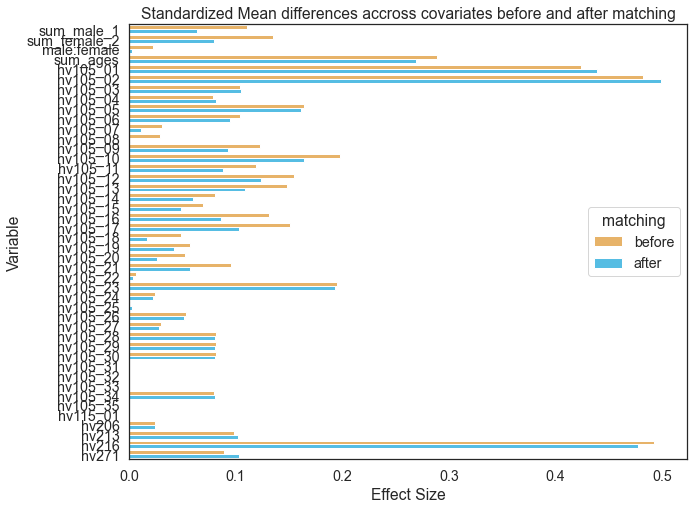

In [31]:
psm.effect_size_plot(before_color='#FCB754', after_color='#3EC8FB', save=False)


#high level vs low level of internet is different by 0.5 in hv216, in theory we should expect the sizze of the orange value to drop like for male/female
#this is not happening everywhere, like hv105_01 and 02 the blue is bigger than the orange. Why is it getting worse? 
#